In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data
from pymodulon.plotting import *
import pymodulon
from pymodulon.enrichment import *

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')

# import venn

# Differential iModulon Activity (DiMA) analysis

In [3]:
ica_data_ddb = load_json_model("../data/ica_data/ddb_sd_ica_data.json")
ica_data_ddb_self_centered = load_json_model("../data/ica_data/ddb_sd_self_centered.json")
ica_data = load_json_model("../data/ica_data/ecoli_p1k.json")

In [4]:
def get_systems_category_group_dict(iMs):
    df = ica_data.imodulon_table.system_category.loc[iMs]
    df = df.sort_values(ascending=True)
    my_dict = df.to_dict()
    return my_dict

## WT strain

In [5]:
sample_1 = "ddb_ff_sd:DDB35 C-lim"
sample_2 = "ddb_ff_sd:DDB35 C-starv"

,difference,pvalue,qvalue,0,1
Sulfate,3.845174,0.002872,0.057806,0.618125,4.463300
Cysteine-1,3.428550,0.000004,0.000415,-4.973143,-1.544594
Fur-1,-2.815611,0.005548,0.092928,2.164480,-0.651131
GadXW,-3.946368,0.000558,0.018678,-0.221727,-4.168095
Putrescine,-5.288411,0.002524,0.057806,-1.009159,-6.297570


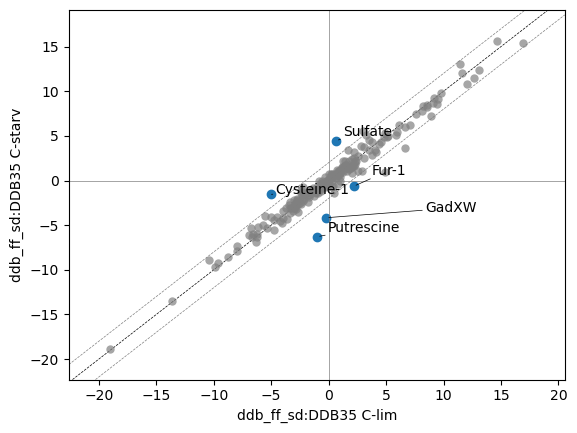

In [8]:
ax, wt_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True,
    label=True
)
wt_table

In [9]:
wt_groups = get_systems_category_group_dict(wt_table.index)
wt_groups

{'Sulfate': 'Metabolism',
 'Cysteine-1': 'Metabolism',
 'Putrescine': 'Metabolism',
 'Fur-1': 'Stress Responses',
 'GadXW': 'Stress Responses'}

## del-cra strain

In [10]:
sample_1 = "ddb_ff_sd:SDT178 C-lim"
sample_2 = "ddb_ff_sd:SDT178 C-starv"

,difference,pvalue,qvalue,0,1
Cysteine-1,2.799491,2.992204e-05,7.517913e-04,-3.764096,-0.964605
ROS TALE Del-2,2.672734,4.021201e-03,3.697440e-02,-1.042418,1.630316
YgeV,2.638886,2.893010e-03,3.420559e-02,1.843309,4.482194
Fur-2,-2.122578,8.525565e-03,6.120138e-02,-3.657389,-5.779967
rcsB KO,-3.120919,3.070877e-13,3.086231e-11,-1.222430,-4.343349
UC-8,-3.598885,1.393623e-02,8.488433e-02,11.739188,8.140303
Lrp,-3.848709,1.423509e-03,1.907502e-02,-6.152541,-10.001250
FliA,-4.075105,2.946114e-09,1.973897e-07,5.193710,1.118604
Fur-1,-4.114368,1.146936e-03,1.773339e-02,-2.486167,-6.600535
Putrescine,-4.488044,4.293115e-03,3.697440e-02,-3.340006,-7.828050


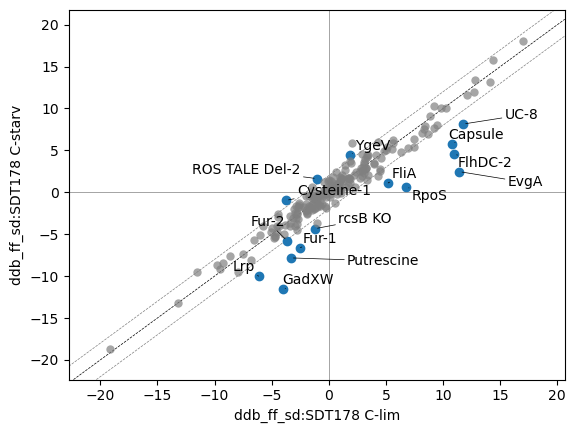

In [11]:
ax, cra_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True
)
cra_table

In [12]:
cra_groups = get_systems_category_group_dict(cra_table.index)
cra_groups

{'ROS TALE Del-2': 'ALE Effects',
 'rcsB KO': 'Genetic Alterations',
 'Cysteine-1': 'Metabolism',
 'YgeV': 'Metabolism',
 'Lrp': 'Metabolism',
 'Putrescine': 'Metabolism',
 'Fur-2': 'Stress Responses',
 'FliA': 'Stress Responses',
 'Fur-1': 'Stress Responses',
 'Capsule': 'Stress Responses',
 'RpoS': 'Stress Responses',
 'FlhDC-2': 'Stress Responses',
 'GadXW': 'Stress Responses',
 'EvgA': 'Stress Responses',
 'UC-8': 'Unknown'}

## del-crp strain

In [13]:
sample_1 = "ddb_ff_sd:SDT202 C-lim"
sample_2 = "ddb_ff_sd:SDT202 C-starv"

,difference,pvalue,qvalue,0,1
Ile/Val,2.626764,6.602208e-09,0.000001,-8.222009,-5.595245
Cysteine-1,2.493195,8.446064e-05,0.004244,-3.929119,-1.435924
Biotin,2.100429,1.779174e-03,0.044702,-1.164695,0.935734
GadXW,-3.371358,1.330131e-03,0.039903,8.630415,5.259057
Lrp,-3.488754,2.085130e-03,0.046568,-7.325476,-10.814230
Zinc-1,-3.888435,4.650102e-03,0.070837,7.956124,4.067688
RpoS,-3.910086,4.640908e-03,0.070837,13.320019,9.409933
Fur-1,-3.939786,1.389648e-03,0.039903,0.294805,-3.644981
Capsule,-7.540999,5.140192e-03,0.070837,14.205384,6.664384


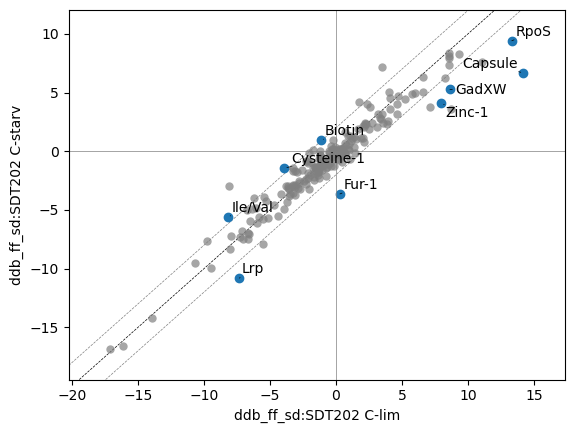

In [14]:
ax, crp_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True
)
crp_table

In [15]:
crp_groups = get_systems_category_group_dict(crp_table.index)
crp_groups

{'Ile/Val': 'Metabolism',
 'Cysteine-1': 'Metabolism',
 'Biotin': 'Metabolism',
 'Lrp': 'Metabolism',
 'GadXW': 'Stress Responses',
 'Zinc-1': 'Stress Responses',
 'RpoS': 'Stress Responses',
 'Fur-1': 'Stress Responses',
 'Capsule': 'Stress Responses'}

## del-fliA strain

In [16]:
sample_1 = "ddb_ff_sd:SDT201 C-lim"
sample_2 = "ddb_ff_sd:SDT201 C-starv"

,difference,pvalue,qvalue,0,1
Cysteine-1,2.500833,0.000082,0.006673,-4.868770,-2.367937
EvgA,-2.539086,0.000000,0.000000,7.261335,4.722249


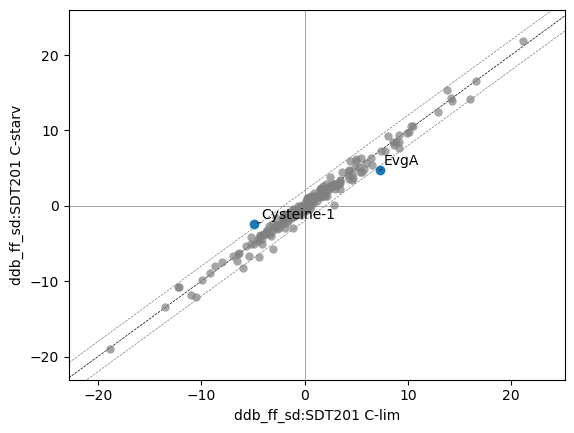

In [17]:
ax, fliA_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True
)
fliA_table

In [18]:
fliA_groups = get_systems_category_group_dict(fliA_table.index)
fliA_groups

{'Cysteine-1': 'Metabolism', 'EvgA': 'Stress Responses'}

## del-prpR strain

In [19]:
sample_1 = "ddb_ff_sd:SDT173 C-lim"
sample_2 = "ddb_ff_sd:SDT173 C-starv"

,difference,pvalue,qvalue,0,1
Sulfate,3.598675,0.003662,0.081786,-0.068390,3.530284
Cysteine-1,2.957228,0.000018,0.001797,-4.925761,-1.968533
Salicylic Acid,2.069559,0.001878,0.062918,-1.185675,0.883884
Fur-1,-3.182133,0.003422,0.081786,-0.655916,-3.838050
Putrescine,-4.241878,0.005119,0.099812,-3.859457,-8.101334


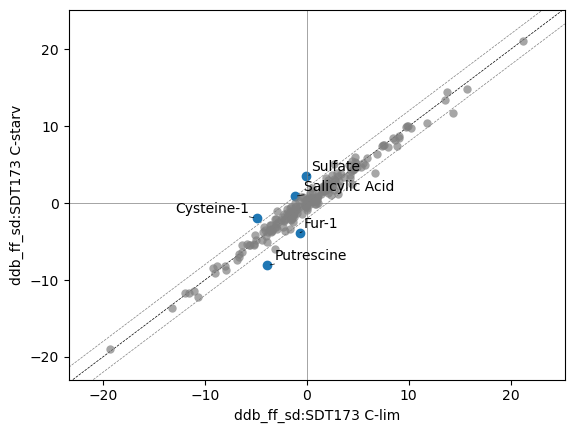

In [20]:
ax, prpR_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True
)
prpR_table

In [21]:
prpR_groups = get_systems_category_group_dict(prpR_table.index)
prpR_groups

{'Sulfate': 'Metabolism',
 'Cysteine-1': 'Metabolism',
 'Putrescine': 'Metabolism',
 'Salicylic Acid': 'Stress Responses',
 'Fur-1': 'Stress Responses'}

## del-rpoS strain

In [22]:
sample_1 = "ddb_ff_sd:SDT180 C-lim"
sample_2 = "ddb_ff_sd:SDT180 C-starv"

,difference,pvalue,qvalue,0,1
Sulfate,3.555813,3.824151e-03,0.054904,4.002833,7.558647
Osmoprotectant,3.500451,9.161690e-07,0.000061,-0.574573,2.925878
CpxR,-2.116539,3.241868e-04,0.009687,2.736585,0.620046
Fur-1,-4.148898,1.104886e-03,0.022208,-8.772025,-12.920923
Fur-2,-4.493763,3.373529e-04,0.009687,-9.068654,-13.562417
FlhDC-2,-5.455711,6.571132e-03,0.088053,10.005891,4.550180
Capsule,-9.301059,3.161264e-03,0.048878,16.520112,7.219052


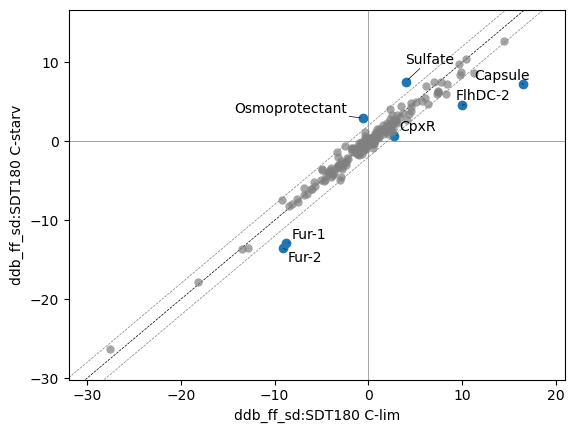

In [23]:
ax, rpoS_table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=0.1,
    threshold=2,
    line45_margin=2,
    table=True
)
rpoS_table

In [24]:
rpoS_groups = get_systems_category_group_dict(rpoS_table.index)
rpoS_groups

{'Sulfate': 'Metabolism',
 'Osmoprotectant': 'Stress Responses',
 'CpxR': 'Stress Responses',
 'Fur-1': 'Stress Responses',
 'Fur-2': 'Stress Responses',
 'FlhDC-2': 'Stress Responses',
 'Capsule': 'Stress Responses'}

# Expalined Variance

In [25]:
rec_var = {}
for k in ica_data_ddb_self_centered.imodulon_names:
    rec_var[k] = explained_variance(ica_data_ddb_self_centered,imodulons=k)
df_rec_var = pd.Series(rec_var)
df_rec_var = df_rec_var.sort_values(ascending=False)
df_rec_var.head(10)

RpoS        0.104957
Crp-2       0.044961
Crp-1       0.030601
GadXW       0.028270
Capsule     0.027960
Curli-2     0.025943
UC-3        0.021909
Curli-1     0.021748
crp KO-1    0.020867
FlhDC-2     0.019676
dtype: float64

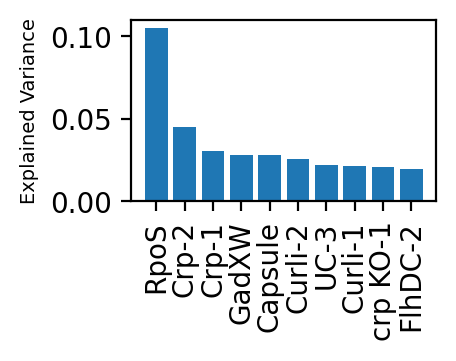

In [26]:
fig, ax = plt.subplots(dpi=200)

ax.bar(range(0,10,1),df_rec_var.head(10),tick_label = df_rec_var.head(10).index)
ax.set_ylabel('Explained Variance',fontsize=7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

w=50/25.4
h=30/25.4
fig.set_size_inches(w=w,h=h)